### imports

In [1]:
import pandas as pd
from transformers import ViTImageProcessor, ViTModel, ViTImageProcessorFast
import chromadb
from chromadb import Documents, EmbeddingFunction, Embeddings
from chromadb.utils.data_loaders import ImageLoader
from IPython.display import Image

/Users/shogun/.pyenv/versions/3.10.6/envs/inspiart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Workbook to demonstrate querying a ChromaDB

## †he custom embedding class

In [2]:
class GoogleVITHuge224Embedding(EmbeddingFunction):

    '''
    A class to provide custom embeddings to a ChromaDB database
    embedding images using the Google vit-huge-patch14-224-in21k
    the class returns an embedding as a numpy array
    '''


    def __call__(self, input: Documents) -> Embeddings:

        #Instantiate the image. Convert it to 244 x 244 and normalise RGB between 0 and 1 witha mean of 0.5 for each channel

        self.feature_extractor = ViTImageProcessorFast.from_pretrained('google/vit-huge-patch14-224-in21k')

        #Instantiate the Google ViT with pretrained weights

        self.model = ViTModel.from_pretrained('google/vit-huge-patch14-224-in21k')#Preprocess the data

        inputs = self.feature_extractor(images=input, return_tensors="pt")

        #Embedd the data

        outputs = self.model(**inputs)

        #Convert the embedding to a Numpy array and take the first vector of the Transformer state

        embeddings = outputs.last_hidden_state.data.numpy()[0,0]

        #return the embedding

        return embeddings

## ßetting up and performing the query

In [3]:
#instantiate the image loader that ChromaDB uses to load pictures

image_loader = ImageLoader()

#intantiate the custom embedding function

image_embbeding_function = GoogleVITHuge224Embedding()

#connect to the database

chroma_client = chromadb.PersistentClient(path='/Users/shogun/code/gwen-m97/inspiart/models/google_vit_sample1000_db')

#connect to the correct collection

images_db = chroma_client.get_or_create_collection(name="google_vit_sample1000_collection", embedding_function=image_embbeding_function, data_loader=image_loader)

#test picture string

query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Two_Young_Girls_at_the_Piano_MET_rl1975.1.201.R.jpg'
#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Piet_Mondriaan,_1942_-_New_York_City_I.jpg'
#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Paul_Cézanne_-_The_Basket_of_Apples_-_1926.252_-_Art_Institute_of_Chicago.jpg'
#query_uris = '/Users/shogun/code/gwen-m97/raw_data/test_images/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg'

#perform the query

image_suggestions = images_db.query(
    query_uris=[query_uris], include=['uris','metadatas']
)


/var/folders/1r/626773hx3mbf2w_31tdjwv6m0000gn/T/ipykernel_69073/435927464.py:7: DeprecationWarning: The class GoogleVITHuge224Embedding does not implement __init__. This will be required in a future version.
  image_embbeding_function = GoogleVITHuge224Embedding()
Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 11214.72it/s]


In [4]:
image_suggestions

{'ids': [['79536-susanna-and-the-elders.jpg',
   '66785-to-robert-schumann.jpg',
   '139626-portrait-of-oscar-miestchaninoff-1913.jpg',
   '95154-young-woman-standing-1895.jpg',
   '48397-waiting-for-the-king-s-favourite-1877-1.jpg',
   '128904-la-parade-1930.jpg',
   '71677-winged-figure-seated-upon-a-rock.jpg',
   '32084-vincenzo-camuccini-manio-curio-dentato-rifiuta-i-doni-dei-sanniti.jpg',
   '47720-the-annunciation-the-angel.jpg',
   '43799-the-finding-of-don-juan-by-haid-e-1871.jpg']],
 'embeddings': None,
 'documents': None,
 'uris': [['/Users/shogun/code/gwen-m97/raw_data/sample1000/79536-susanna-and-the-elders.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/66785-to-robert-schumann.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/139626-portrait-of-oscar-miestchaninoff-1913.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/95154-young-woman-standing-1895.jpg',
   '/Users/shogun/code/gwen-m97/raw_data/sample1000/48397-waiting-for-the-king-s-favourite-

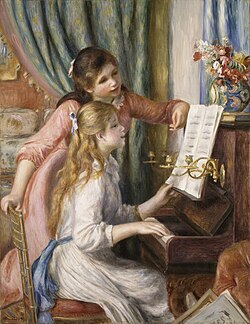

In [5]:
Image('/Users/shogun/code/gwen-m97/raw_data/test_images/Two_Young_Girls_at_the_Piano_MET_rl1975.1.201.R.jpg')

In [6]:
Image(url=f"{image_suggestions['metadatas'][0][0]['img']}")

In [7]:
Image(url=f"{image_suggestions['metadatas'][0][1]['img']}")

In [8]:
Image(url=f"{image_suggestions['metadatas'][0][2]['img']}")

In [9]:
Image(url=f"{image_suggestions['metadatas'][0][3]['img']}")

In [10]:
Image(url=f"{image_suggestions['metadatas'][0][4]['img']}")

In [11]:
Image(url=f"{image_suggestions['metadatas'][0][5]['img']}")

In [12]:
Image(url=f"{image_suggestions['metadatas'][0][6]['img']}")

In [13]:
Image(url=f"{image_suggestions['metadatas'][0][7]['img']}")

In [14]:
Image(url=f"{image_suggestions['metadatas'][0][8]['img']}")

In [15]:
Image(url=f"{image_suggestions['metadatas'][0][9]['img']}")